## Setting up the environment

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
print("✅ Setup working")

✅ Setup working


### Import csv file 

In [4]:
import pandas as pd

df = pd.read_csv("time_series_60min_singleindex.csv")
df.shape

(50401, 300)

### That means: 50,401 hourly records ; 300 columns (multiple countries + metrics)

### Show the first 5 rows

In [5]:
df.head()

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01T02:00:00Z,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01T03:00:00Z,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN


### Select Germany Columns
#### The output shows 50,401 hourly rows and 42 Germany-related columns

In [6]:
cols = [col for col in df.columns if col.startswith("DE_") or col == "utc_timestamp"]

df_de = df[cols]

df_de.shape

(50401, 42)

### Keeping Only Required Columns
#### We Do This because 
#### 300 columns = unnecessary complexity

#### And for focused modeling clean dataset is equal to faster analysis

In [7]:
df_de = df_de[[
    "utc_timestamp",
    "DE_load_actual_entsoe_transparency",
    "DE_load_forecast_entsoe_transparency",
    "DE_solar_generation_actual",
    "DE_wind_generation_actual"
]]

df_de.shape

(50401, 5)

In [8]:
df_de.head()

,utc_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_generation_actual,DE_wind_generation_actual
0,2014-12-31T23:00:00Z,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,41151.0,39723.0,NaN,8852.0
2,2015-01-01T01:00:00Z,40135.0,38813.0,NaN,9054.0
3,2015-01-01T02:00:00Z,39106.0,38490.0,NaN,9070.0
4,2015-01-01T03:00:00Z,38765.0,38644.0,NaN,9163.0


### Converting of time stamp

In [9]:
df_de["utc_timestamp"] = pd.to_datetime(df_de["utc_timestamp"])

df_de = df_de.rename(columns={
    "utc_timestamp": "timestamp",
    "DE_load_actual_entsoe_transparency": "load_actual",
    "DE_load_forecast_entsoe_transparency": "load_forecast",
    "DE_solar_generation_actual": "solar_gen",
    "DE_wind_generation_actual": "wind_gen"
})

df_de.head()

,timestamp,load_actual,load_forecast,solar_gen,wind_gen
0,2014-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN
1,2015-01-01 00:00:00+00:00,41151.0,39723.0,NaN,8852.0
2,2015-01-01 01:00:00+00:00,40135.0,38813.0,NaN,9054.0
3,2015-01-01 02:00:00+00:00,39106.0,38490.0,NaN,9070.0
4,2015-01-01 03:00:00+00:00,38765.0,38644.0,NaN,9163.0


### Check missing values

In [10]:
df_de.isna().sum()

timestamp          0
load_actual        1
load_forecast     25
solar_gen        104
wind_gen          75
dtype: int64

### Handle Missing Values- Since missing values are very small compared to 50,401 rows or missing values were negligible (<0.3%), so rows were removed to maintain model integrity.

In [11]:
df_de = df_de.dropna()

df_de.isna().sum()

timestamp        0
load_actual      0
load_forecast    0
solar_gen        0
wind_gen         0
dtype: int64

In [12]:
df_de.shape

(50271, 5)

### Creating of time based features-

In [13]:
df_de["hour"] = df_de["timestamp"].dt.hour
df_de["dayofweek"] = df_de["timestamp"].dt.dayofweek
df_de["month"] = df_de["timestamp"].dt.month
df_de["year"] = df_de["timestamp"].dt.year

df_de.head()

,timestamp,load_actual,load_forecast,solar_gen,wind_gen,hour,dayofweek,month,year
8,2015-01-01 07:00:00+00:00,41133.0,42522.0,71.0,10208.0,7,3,1,2015
9,2015-01-01 08:00:00+00:00,42963.0,45020.0,773.0,10029.0,8,3,1,2015
10,2015-01-01 09:00:00+00:00,45088.0,47101.0,2117.0,10550.0,9,3,1,2015
11,2015-01-01 10:00:00+00:00,47013.0,49603.0,3364.0,11390.0,10,3,1,2015
12,2015-01-01 11:00:00+00:00,48159.0,49910.0,4198.0,12103.0,11,3,1,2015


## PHASE 1 — Create Baseline Model

### Step 1- Create Naive Forecast- 
#### Yesterday same hour = today’s prediction
#### shift(24)- Because data is hourly → 24 hours = previous day same hour.

In [14]:
df_de["naive_forecast"] = df_de["load_actual"].shift(24)

df_de.head()

,timestamp,load_actual,load_forecast,solar_gen,wind_gen,hour,dayofweek,month,year,naive_forecast
8,2015-01-01 07:00:00+00:00,41133.0,42522.0,71.0,10208.0,7,3,1,2015,NaN
9,2015-01-01 08:00:00+00:00,42963.0,45020.0,773.0,10029.0,8,3,1,2015,NaN
10,2015-01-01 09:00:00+00:00,45088.0,47101.0,2117.0,10550.0,9,3,1,2015,NaN
11,2015-01-01 10:00:00+00:00,47013.0,49603.0,3364.0,11390.0,10,3,1,2015,NaN
12,2015-01-01 11:00:00+00:00,48159.0,49910.0,4198.0,12103.0,11,3,1,2015,NaN


### Step 2-Drop First 24 Rows (Since They Have NaN)

In [15]:
df_model = df_de.dropna()

df_model.shape

(50247, 10)

### Step 3 - Calculate Baseline Error

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_baseline = mean_absolute_error(df_model["load_actual"], df_model["naive_forecast"])
rmse_baseline = np.sqrt(mean_squared_error(df_model["load_actual"], df_model["naive_forecast"]))

print("Baseline MAE:", mae_baseline)
print("Baseline RMSE:", rmse_baseline)

Baseline MAE: 4468.010448384978
Baseline RMSE: 6882.2140987887215


### Baseline MAE ≈ 4468 MW
### Baseline RMSE ≈ 6882 MW

#### This means: On average, yesterday’s same-hour method makes an error of ~4.4 GW. That’s our benchmark.

## Phase 2- Build Regression Model-->
### We will predict: load_actual ; Using:
#### hour
#### dayofweek
#### month
#### solar_gen
#### wind_gen

### Step 1 — Define Features & Target

In [17]:
features = ["hour", "dayofweek", "month", "solar_gen", "wind_gen"]

X = df_model[features]
y = df_model["load_actual"]

## Step 2 — Train/Test Split

In [18]:
split_index = int(len(df_model) * 0.8)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

### Step 3 — Train Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### Step 4 — Calculate Model Error

In [20]:
mae_model = mean_absolute_error(y_test, y_pred)
rmse_model = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model MAE:", mae_model)
print("Model RMSE:", rmse_model)

Model MAE: 7279.677654568152
Model RMSE: 8800.215819959561


## Calculate Improvement %

In [21]:
improvement = ((mae_baseline - mae_model) / mae_baseline) * 100
print("Improvement %:", improvement)

Improvement %: -62.92884134144066


### We got: 
#### Baseline MAE ≈ 4468
#### Model MAE ≈ 7279
#### Improvement ≈ -62%

#### Meaning: The regression model is WORSE than naive forecast. And that is completely normal in time-series problems.

### Why Did This Happen?
#### Since our baseline: Yesterday same hour
#### Electricity demand is highly seasonal and autocorrelated. So yesterday’s value is already a strong predictor.
#### Our regression model used: hour, dayofweek, month, solar, wind
#### But we did NOT include the previous load values which is critical in time-series. So without lag features, regression struggles.

## PHASE 3 — Improve Model (By adding Lag Feature)

### Here I add: **Previous hour load** and **Previous day same hour load**

### Step 1 — Add Lag Features

In [22]:
df_de["lag_1"] = df_de["load_actual"].shift(1)
df_de["lag_24"] = df_de["load_actual"].shift(24)

df_model = df_de.dropna()

### Step 2 — Update Features

In [23]:
features = [
    "hour",
    "dayofweek",
    "month",
    "solar_gen",
    "wind_gen",
    "lag_1",
    "lag_24"
]

X = df_model[features]
y = df_model["load_actual"]

split_index = int(len(df_model) * 0.8)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

### Step 3 — Train Again

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae_model = mean_absolute_error(y_test, y_pred)
rmse_model = np.sqrt(mean_squared_error(y_test, y_pred))

print("New Model MAE:", mae_model)
print("New Model RMSE:", rmse_model)

New Model MAE: 1436.9147679822777
New Model RMSE: 1878.481618643608


### Step 4 — Compare Again

In [25]:
improvement = ((mae_baseline - mae_model) / mae_baseline) * 100
print("Improvement %:", improvement)

Improvement %: 67.83994163438742


### Now we received - 
#### Baseline MAE ≈ 4468 MW
#### Improved Model MAE ≈ 1437 MW
#### Improvement ≈ 67.84%
### Initial regression underperformed baseline. After feature engineering with lag variables, the improved model reduced average forecast error by ~3,031 MW and achieved ~68% improvement over naive baseline

## Adding of statistics layer-->

## PHASE 4 — Hypothesis Testing (Weekday vs Weekend Demand)
#### For a business Question- Is average electricity demand statistically higher on weekdays compared to weekends?

### Step 1 — Create Weekend Indicator

In [26]:
df_de["is_weekend"] = df_de["dayofweek"].isin([5, 6])  # Saturday=5, Sunday=6

df_de.head()

,timestamp,load_actual,load_forecast,solar_gen,wind_gen,hour,dayofweek,month,year,naive_forecast,lag_1,lag_24,is_weekend
8,2015-01-01 07:00:00+00:00,41133.0,42522.0,71.0,10208.0,7,3,1,2015,NaN,NaN,NaN,False
9,2015-01-01 08:00:00+00:00,42963.0,45020.0,773.0,10029.0,8,3,1,2015,NaN,41133.0,NaN,False
10,2015-01-01 09:00:00+00:00,45088.0,47101.0,2117.0,10550.0,9,3,1,2015,NaN,42963.0,NaN,False
11,2015-01-01 10:00:00+00:00,47013.0,49603.0,3364.0,11390.0,10,3,1,2015,NaN,45088.0,NaN,False
12,2015-01-01 11:00:00+00:00,48159.0,49910.0,4198.0,12103.0,11,3,1,2015,NaN,47013.0,NaN,False


### Step 2 — Separating of Data

In [29]:
weekday_mean = df_de[df_de["is_weekend"] == False]["load_actual"].mean()
weekend_mean = df_de[df_de["is_weekend"] == True]["load_actual"].mean()

print("Weekday Mean:", weekday_mean)
print("Weekend Mean:", weekend_mean)

Weekday Mean: 58583.51853915369
Weekend Mean: 47751.41728120217


### Step 3 — Perform T-Test

In [28]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(weekday_load, weekend_load, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 147.9479674042751
P-value: 0.0


## PHASE 5 — Peak Demand Analysis

We define:

Peak hours = top 5% highest load values.

### Step 1 — Calculate 95th Percentile

In [30]:
peak_threshold = df_de["load_actual"].quantile(0.95)

print("Peak Threshold (95th percentile):", peak_threshold)

Peak Threshold (95th percentile): 70849.5


### Step 2 — Count Peak Hours

In [31]:
peak_hours = df_de[df_de["load_actual"] >= peak_threshold]

print("Number of Peak Hours:", len(peak_hours))

Number of Peak Hours: 2514


### Step 3 — Percentage of Total

In [32]:
print("Peak % of total data:", len(peak_hours) / len(df_de) * 100)

Peak % of total data: 5.000895148296235


## Quantifying are peak hours more common in winter or summer?

### Step 1 — Group Peak Hours by Month

In [33]:
peak_month_distribution = peak_hours["timestamp"].dt.month.value_counts().sort_index()

peak_month_distribution

timestamp
1     748
2     505
3     169
4       4
6      13
7       4
9       3
10     34
11    498
12    536
Name: count, dtype: int64

### Step 2 — Convert to Percentage

In [34]:
(peak_month_distribution / len(peak_hours)) * 100

timestamp
1     29.753381
2     20.087510
3      6.722355
4      0.159109
6      0.517104
7      0.159109
9      0.119332
10     1.352426
11    19.809069
12    21.320605
Name: count, dtype: float64

### Peak hours by month (count)

In [35]:
peak_month_counts = peak_hours["timestamp"].dt.month.value_counts().sort_index()
peak_month_counts

timestamp
1     748
2     505
3     169
4       4
6      13
7       4
9       3
10     34
11    498
12    536
Name: count, dtype: int64

### Peak hours by month (percentage)

In [36]:
peak_month_pct = (peak_month_counts / len(peak_hours)) * 100
peak_month_pct.round(2)

timestamp
1     29.75
2     20.09
3      6.72
4      0.16
6      0.52
7      0.16
9      0.12
10     1.35
11    19.81
12    21.32
Name: count, dtype: float64

### Plot

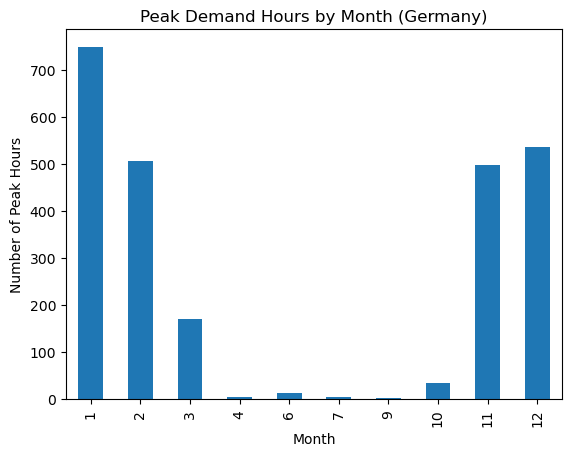

In [37]:
import matplotlib.pyplot as plt

peak_month_counts.plot(kind="bar")
plt.title("Peak Demand Hours by Month (Germany)")
plt.xlabel("Month")
plt.ylabel("Number of Peak Hours")
plt.show()

### Key Insight- Peak demand is heavily concentrated in Winter months (Nov–Feb)

#### Let’s quantify that:

#### Nov + Dec + Jan + Feb = 19.81 + 21.32 + 29.75 + 20.09 ≈ 90.97%

#### Almost 91% of extreme demand hours occur in winter.

## Adding automation layer- Wrap Model Into Function-->

In [39]:
def run_forecast_model(data):
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_absolute_error
    import numpy as np

    data = data.copy()

    data["lag_1"] = data["load_actual"].shift(1)
    data["lag_24"] = data["load_actual"].shift(24)

    data = data.dropna()

    features = ["hour", "dayofweek", "month", "solar_gen", "wind_gen", "lag_1", "lag_24"]

    X = data[features]
    y = data["load_actual"]

    split_index = int(len(data) * 0.8)

    X_train = X.iloc[:split_index]
    X_test = X.iloc[split_index:]

    y_train = y.iloc[:split_index]
    y_test = y.iloc[split_index:]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)

    return mae

In [40]:
final_mae = run_forecast_model(df_de)
print("Automated Model MAE:", final_mae)

Automated Model MAE: 1436.9147679822777


## Testing

In [43]:
df_de.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50271 entries, 8 to 50400
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   timestamp       50271 non-null  datetime64[ns, UTC]
 1   load_actual     50271 non-null  float64            
 2   load_forecast   50271 non-null  float64            
 3   solar_gen       50271 non-null  float64            
 4   wind_gen        50271 non-null  float64            
 5   hour            50271 non-null  int32              
 6   dayofweek       50271 non-null  int32              
 7   month           50271 non-null  int32              
 8   year            50271 non-null  int32              
 9   naive_forecast  50247 non-null  float64            
 10  lag_1           50270 non-null  float64            
 11  lag_24          50247 non-null  float64            
 12  is_weekend      50271 non-null  bool               
dtypes: bool(1), datetime64[ns, UTC](1), 

In [44]:
df_de.describe()

,load_actual,load_forecast,solar_gen,wind_gen,hour,dayofweek,month,year,naive_forecast,lag_1,lag_24
count,50271.000000,50271.000000,50271.000000,50271.000000,50271.000000,50271.000000,50271.000000,50271.000000,50247.000000,50270.000000,50247.000000
mean,55486.293032,54787.559070,4565.743470,11547.092857,11.501064,2.999881,6.322810,2017.394184,55485.200908,55486.492461,55485.200908
std,10015.783089,9496.964389,6940.312453,9074.786487,6.922081,2.000646,3.385354,1.661502,10016.598214,10015.782898,10016.598214
min,31307.000000,28824.000000,0.000000,135.000000,0.000000,0.000000,1.000000,2015.000000,31307.000000,31307.000000,31307.000000
25%,47100.000000,46983.000000,0.000000,4502.000000,6.000000,1.000000,3.000000,2016.000000,47099.500000,47100.000000,47099.500000
50%,55087.000000,54719.000000,172.000000,9010.000000,12.000000,3.000000,6.000000,2017.000000,55085.000000,55087.500000,55085.000000
75%,64303.500000,62873.000000,7340.500000,16107.500000,18.000000,5.000000,9.000000,2019.000000,64303.500000,64303.750000,64303.500000
max,77549.000000,75912.000000,32947.000000,46064.000000,23.000000,6.000000,12.000000,2020.000000,77549.000000,77549.000000,77549.000000


In [45]:
df.columns[:30]

Index(['utc_timestamp', 'cet_cest_timestamp',
       'AT_load_actual_entsoe_transparency',
       'AT_load_forecast_entsoe_transparency', 'AT_price_day_ahead',
       'AT_solar_generation_actual', 'AT_wind_onshore_generation_actual',
       'BE_load_actual_entsoe_transparency',
       'BE_load_forecast_entsoe_transparency', 'BE_solar_generation_actual',
       'BE_wind_generation_actual', 'BE_wind_offshore_generation_actual',
       'BE_wind_onshore_generation_actual',
       'BG_load_actual_entsoe_transparency',
       'BG_load_forecast_entsoe_transparency', 'BG_solar_generation_actual',
       'BG_wind_onshore_generation_actual',
       'CH_load_actual_entsoe_transparency',
       'CH_load_forecast_entsoe_transparency', 'CH_solar_capacity',
       'CH_solar_generation_actual', 'CH_wind_onshore_capacity',
       'CH_wind_onshore_generation_actual',
       'CY_load_actual_entsoe_transparency',
       'CY_load_forecast_entsoe_transparency',
       'CY_wind_onshore_generation_actual',
  